##### PROJECT INTRODUCTION:
Should the city address street lighting issues on priority to reduce crime rates in Chicago neighborhoods?

The Aim of this project is to investigate the correlation between enhanced street lighting, and its potential impact on crime rates, particularly in high-crime areas by leveraging ML models such as random forest, logistic regression and visualizations. Insights from this study could inform crime reduction strategies for law enforcement agencies, aiding in the adaptation of patrolling methods and resource allocation. Additionally, urban planners and architects stand to benefit by utilizing findings to design safer, well-lit neighborhoods.

##### TEAM MEMBER CONTRIBUTION

Preprocessing: dgadda4@uic.edu<br>
Visualizations: dnekka2@uic.edu and mpulla4@uic.edu<br> 
ML Modlels: hsoman3@uic.edu and rsanti30@uic.edu

##### GITHUB LINK: 
https://github.com/uic-ds-fall-2023/class-project-data-scouts

# 1) DATA

##### Data Cleaning:
We cleaned our data by converting the datatypes of certain columns to the correct format, removing the rows which has null values<br>
and dropping the columns which are irrelevant for the project. These steps can also be seen in our code for both datasets.

##### Exploratory Data Analysis:

Type of Features in crime dataset
+ Crime type
+ Arrest( tells us whether police arrest was successfull or not)
+ Incident location (longitude and latitude)

 Type of Features in street lights dataset.
+ Location and zip code of the service request 
+ Date of service request
+ Street address, community area.


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import string
from IPython.display import display, Latex, Markdown
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [2]:
merged_crimes = pd.read_csv("crimes_from2001.csv")

In [3]:
merged_crimes.shape

(7902252, 31)

In [3]:
merged_crimes.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats', 'Wards 2023-'],
      dtype='object')

In [4]:
merged_crimes['Date'] = pd.to_datetime(merged_crimes['Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

In [5]:
merged_crimes = merged_crimes.sort_values(by='Date')
merged_crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Wards 2023-
7902251,6739668,HR150281,2001-01-01,007XX N MICHIGAN AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,"(41.896660307, -87.624110268)",22.0,21182.0,37.0,158.0,11.0,6.0,14.0,71.0,2.0
7901027,1310811,G001279,2001-01-01,008XX N MASSASOIT AV,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,"(41.895395646, -87.769213879)",52.0,4299.0,26.0,671.0,7.0,5.0,25.0,70.0,29.0
7901028,1310862,G001184,2001-01-01,035XX W BELMONT AV,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,"(41.939344247, -87.715826077)",15.0,21538.0,22.0,138.0,12.0,39.0,1.0,20.0,35.0
7901029,1628960,G405170,2001-01-01,022XX W DIVISION ST,0560,ASSAULT,SIMPLE,HOSPITAL BUILDING/GROUNDS,False,False,...,"(41.902969413, -87.683487077)",16.0,21560.0,25.0,541.0,11.0,4.0,15.0,63.0,1.0
7901030,1564504,G325171,2001-01-01,021XX W 19 ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,"(41.855912479, -87.678901768)",8.0,14920.0,33.0,4.0,26.0,43.0,15.0,121.0,25.0


In [6]:
merged_crimes.isnull().sum()

ID                                 0
Case Number                        0
Date                               0
Block                              0
IUCR                               0
Primary Type                       0
Description                        0
Location Description           11828
Arrest                             0
Domestic                           0
Beat                               0
District                          47
Ward                          614849
Community Area                613476
FBI Code                           0
X Coordinate                   89910
Y Coordinate                   89910
Year                               0
Updated On                         0
Latitude                       89910
Longitude                      89910
Location                       89910
Historical Wards 2003-2015    113087
Zip Codes                      89910
Community Areas               109933
Census Tracts                 107854
Wards                         109812
B

In [7]:
merged_crimes.dropna(subset = ['District', 'Latitude','Longitude','X Coordinate','Y Coordinate','Location Description','Ward','Community Area'], inplace = True)

In [8]:
column_list = [ "Historical Wards 2003-2015","Zip Codes" ,"Community Areas","Census Tracts","Wards","Boundaries - ZIP Codes","Police Districts","Police Beats","Wards 2023-"]      

In [9]:
merged_crimes.drop(columns = column_list,inplace = True)

In [10]:
merged_crimes.shape

(7198274, 22)

In [11]:
merged_crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [19]:
chicago_neighborhoods = {1: 'Rogers Park', 2: 'West Ridge', 3: 'Uptown',4: 'Lincoln Square',5: 'North Center',6: 'Lake View',7: 'Lincoln Park',8: 'Near North Side',
9: 'Edison Park',10: 'Norwood Park',11: 'Jefferson Park',12: 'Forest Glen',13: 'North Park',14: 'Albany Park',15: 'Portage Park',16: 'Irving Park',17: 'Dunning',
18: 'Montclare',19: 'Belmont Cragin',20: 'Hermosa',21: 'Avondale',22: 'Logan Square',23: 'Humboldt Park',24: 'West Town',25: 'Austin',26: 'West Garfield Park',
27: 'East Garfield Park',28: 'Near West Side',29: 'North Lawndale',30: 'South Lawndale',31: 'Lower West Side',32: 'The Loop',33: 'Near South Side',
34: 'Armour Square',35: 'Douglas',36: 'Oakland',37: 'Fuller Park',38: 'Grand Boulevard',39: 'Kenwood',40: 'Washington Park',41: 'Hyde Park',42: 'Woodlawn',
43: 'South Shore',44: 'Chatham',45: 'Avalon Park',46: 'South Chicago',47: 'Burnside',48: 'Calumet Heights',49: 'Roseland',50: 'Pullman',
51: 'South Deering',52: 'East Side',53: 'West Pullman',54: 'Riverdale',55: 'Hegewisch',56: 'Garfield Ridge',57: 'Archer Heights',
58: 'Brighton Park',59: 'McKinley Park',60: 'Bridgeport',61: 'New City',62: 'West Elsdon',63: 'Gage Park',64: 'Clearing',65: 'West Lawn',
66: 'Chicago Lawn',67: 'West Englewood',68: 'Englewood',69: 'Greater Grand Crossing',70: 'Ashburn',71: 'Auburn Gresham',72: 'Beverly',73: 'Washington Heights',
74: 'Mount Greenwood',75: 'Morgan Park',76: "O'Hare",77: 'Edgewater'
}

In [20]:
south_neighborhoods = {60: 'Bridgeport',34: 'Armour Square',37: 'Fuller Park',35: 'Douglas',38: 'Grand Boulevard',40: 'Washington Park',
69: 'Greater Grand Crossing',43: 'South Shore',41: 'Hyde Park',42: 'Woodlawn',39: 'Kenwood',36: 'Oakland'}

In [12]:
# The above 2 cells contains dictionaries that have been manually created using wikipedia to match the community area with it's accurate name.
# Reason to do it is because we only had numbers of community areas but not it's names.
# The dictionary south_neighborhoods has also been created to help with the hypotheses of a visualization

In [17]:
merged_crimes['Primary Type'].unique()

array(['THEFT', 'SEX OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'HOMICIDE',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'BURGLARY', 'NARCOTICS',
       'ASSAULT', 'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'ROBBERY', 'BATTERY', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL DAMAGE',
       'GAMBLING', 'CRIMINAL TRESPASS', 'KIDNAPPING', 'PROSTITUTION',
       'LIQUOR LAW VIOLATION', 'ARSON', 'INTIMIDATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'OBSCENITY',
       'PUBLIC INDECENCY', 'OTHER NARCOTIC VIOLATION', 'RITUALISM',
       'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'HUMAN TRAFFICKING', 'NON - CRIMINAL',
       'CONCEALED CARRY LICENSE VIOLATION'], dtype=object)

In [ ]:
# The above cell output displays all the different types of crimes in this large historical dataset.

In [18]:
merged_crimes["Community Area"].unique()

array([ 8., 67., 23., 38., 66., 53., 19., 49., 71., 13.,  3., 56., 22.,
       28., 50., 27., 43., 15., 76.,  7., 46.,  1., 25., 40.,  6., 14.,
       32., 68., 48., 26., 29., 16., 61., 42., 77., 70., 33., 31., 24.,
       30., 20., 21., 44., 69., 58., 10., 39., 72., 62., 59., 73., 41.,
       35., 75., 64., 54., 11., 63.,  4., 12., 52., 60., 65., 47., 74.,
       34.,  5., 17., 18.,  2., 37., 45., 51., 57.,  9., 55., 36.,  0.])

In [19]:
merged_crimes = merged_crimes[(merged_crimes['Community Area'] != 0)]

In [20]:
merged_crimes["Community Area"].dtypes

dtype('float64')

In [22]:
merged_crimes['Community Area'] = merged_crimes['Community Area'].astype('int64')

In [ ]:
# As we can see above, the datatype of the "community area" column is of float type and has 0 also as an entry.
# But as per wikipedia, we only have community areas numbered from 1 to 77. 
#The column has been converted to type "int" for easier access in the rest of the project.

In [22]:
model_df = merged_crimes.copy()
# creating a new dataframe to prevent overlapping with the main dataframe

In [57]:
model_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

# 2) ML Models Implementation

We're performing prediction on the "Arrest" feature in a crime dataset. It preprocesses the data by sampling, handling missing values, and encoding categorical variables.<br>

This project utilized three different machine learning models—decision trees, random forests, and gradient boosting.<br> 
Initially employing decision tree as our baseline classifier, we attained the highest accuracy of 89.20% using gradient boosting.<br>

The reason behind the superior performance of gradient boosting lies in its capability to effectively handle heterogeneous and categorical data present in our dataset.<br> 
These data types were primarily community area numbers and arrest features.<br> 
Specifically, gradient boosting excelled at dealing with the complexity in such data types, contributing significantly to its performance.<br>

To assess and compare the machine learning models, we employed four evaluation metrics: Accuracy, Recall, Precision, F1 score<br> 
These metrics provided a comprehensive understanding of the models' performance and allowed for a robust comparative analysis.<br>

In [26]:
sampled_df = model_df.copy()
from sklearn.preprocessing import LabelEncoder

In [32]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb

In [33]:
sampled_df = model_df.sample(frac=0.1, random_state=42)
sampled_df.dropna(inplace=True)
categorical_cols = sampled_df.select_dtypes(include=['object', 'bool', 'category']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    sampled_df[col] = label_encoder.fit_transform(sampled_df[col])

X = sampled_df.drop('Arrest', axis=1)
y = sampled_df['Arrest']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# RANDOM FOREST
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy*100:.2f}%")
precision = precision_score(y_test, y_pred)
print(f"Random Forest Classifier Precision: {precision*100:.2f}%")
recall = recall_score(y_test, y_pred)
print(f"Random Forest Classifier Recall: {recall*100:.2f}%")
f1 = f1_score(y_test, y_pred)
print(f"Random Forest Classifier F1 Score: {f1*100:.2f}%")
print()

# DECISION TREE
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy*100:.2f}%", )
precision = precision_score(y_test, y_pred)
print(f"Decision Tree Classifier Precision: {precision*100:.2f}%")
recall = recall_score(y_test, y_pred)
print(f"Decision Tree Classifier Recall: {recall*100:.2f}%")
f1 = f1_score(y_test, y_pred)
print(f"Decision Tree Classifier F1 Score: {f1*100:.2f}%")
print()

# GRADIENT BOOSTING
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Classifier Accuracy: {accuracy * 100:.2f}%")
precision = precision_score(y_test, y_pred)
print(f"XGBoost Classifier Precision: {precision*100:.2f}%")
recall = recall_score(y_test, y_pred)
print(f"XGBoost Classifier Recall: {recall*100:.2f}%")
f1 = f1_score(y_test, y_pred)
print(f"XGBoost Classifier F1 Score: {f1*100:.2f}%")

Random Forest Classifier Accuracy: 88.91%
Random Forest Classifier Precision: 88.45%
Random Forest Classifier Recall: 65.17%
Random Forest Classifier F1 Score: 75.05%

Decision Tree Classifier Accuracy: 83.19%
Decision Tree Classifier Precision: 66.66%
Decision Tree Classifier Recall: 68.62%
Decision Tree Classifier F1 Score: 67.63%

XGBoost Classifier Accuracy: 89.20%
XGBoost Classifier Precision: 90.56%
XGBoost Classifier Recall: 64.52%
XGBoost Classifier F1 Score: 75.35%


# 3) VISUALIZATION

3.1

• The given pie chart depicts a representation of the top 10 types of crimes occurring in the city of Chicago.<br> 
• The highest number crimes of a single type occurring are “Theft” followed by “Battery” and “Criminal Damage”.<br>
• This is also consistent with the data on apprehension of suspects given in the next graph.<br>

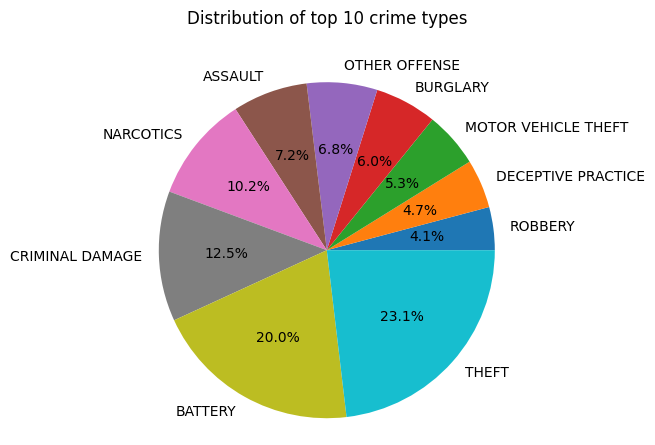

In [66]:
import matplotlib.pyplot as plt

# Use value_counts on the 'Primary Type' column directly from the merged_crimes DataFrame
top_crime_types = merged_crimes['Primary Type'].value_counts().sort_values().tail(10)

# Plotting the pie chart for the top 10 crime types
plt.pie(top_crime_types, labels=top_crime_types.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of top 10 crime types', pad=30)
plt.show()


In [67]:
top_crime_types.tail(10)

Primary Type
ROBBERY                 272830
DECEPTIVE PRACTICE      309236
MOTOR VEHICLE THEFT     352219
BURGLARY                393400
OTHER OFFENSE           446775
ASSAULT                 475970
NARCOTICS               671137
CRIMINAL DAMAGE         825366
BATTERY                1319887
THEFT                  1524103
Name: count, dtype: int64

3.2

• The below presented visualization illustrates the frequency
of arrests and non-arrests corresponding to each
crime type.<br>
• This suggests a correlation where
criminals, cognizant of the risk-reward dynamics,
may strategically choose to engage in crimes with
lower associated risks.<br>
• The observed pattern
underscores the importance of understanding
criminal behavior and risk assessment, providing
valuable insights for law enforcement strategies and
crime prevention measures tailored to the distinct
dynamics of each criminal activity.

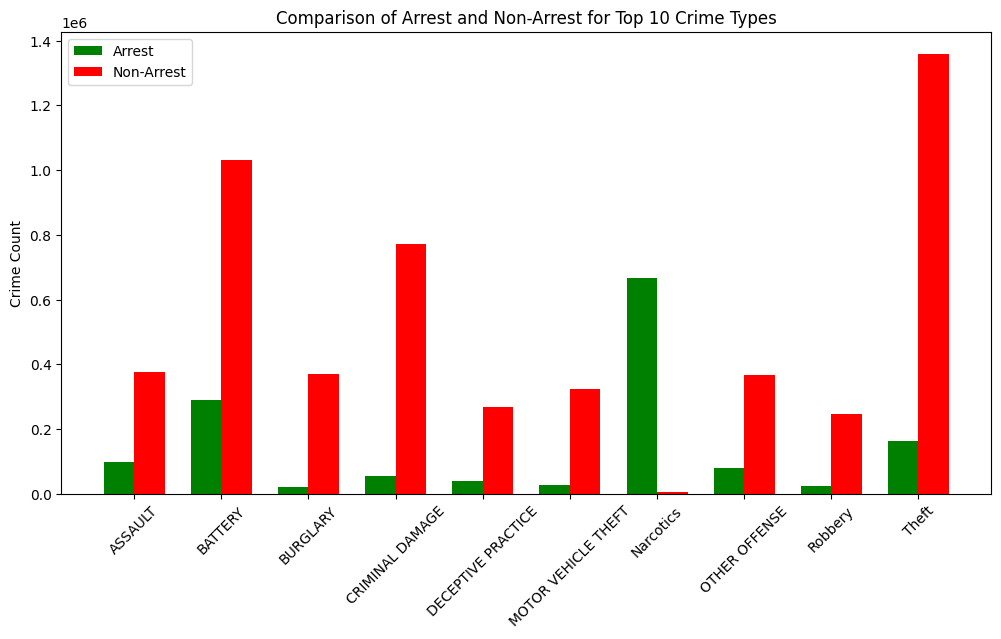

In [68]:
import matplotlib.pyplot as plt
import numpy as np

top_crime_types = merged_crimes['Primary Type'].value_counts().sort_values().tail(10).index

arrest_true_counts = merged_crimes[merged_crimes['Primary Type'].isin(top_crime_types) & (merged_crimes['Arrest'] == True)]['Primary Type'].value_counts().sort_index()
arrest_false_counts = merged_crimes[merged_crimes['Primary Type'].isin(top_crime_types) & (merged_crimes['Arrest'] == False)]['Primary Type'].value_counts().sort_index()

x_indices = np.arange(len(top_crime_types))

width = 0.35  
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x_indices, arrest_true_counts, width, label='Arrest', color='green')

ax.bar(x_indices + width, arrest_false_counts, width, label='Non-Arrest', color='red')

ax.set_ylabel('Crime Count')
ax.set_title('Comparison of Arrest and Non-Arrest for Top 10 Crime Types')
ax.set_xticks(x_indices + width / 2)
ax.set_xticklabels(['ASSAULT','BATTERY' ,'BURGLARY','CRIMINAL DAMAGE' ,'DECEPTIVE PRACTICE','MOTOR VEHICLE THEFT','Narcotics','OTHER OFFENSE','Robbery', 'Theft'], rotation = 45)
ax.legend()

plt.show()

##### HYPOTHESIS

Null Hypothesis: It's a popular belief that south side of chicago is more prone to crime when compared to other regions.<br>
Alternative Hypothesis: There is no such conrete evidence or data analysis to justify this belief.<br>

Result: Based on our visualization of the data for all years that is from 2001 to present , we have 8 neighborhoods from the south side in top 15 neighborhoods by crime_count. Since more than 50% of the top 15 neighborhoods belong to south side, we can accept the null hypothesis.<br>

Why we thought this as interesting is because :<br>
Media Influence: It could explore the role of media in shaping perceptions.<br>
Social Perception vs data analysis: It addresses the observations between popular beliefs or perceptions and objective data analysis<br>

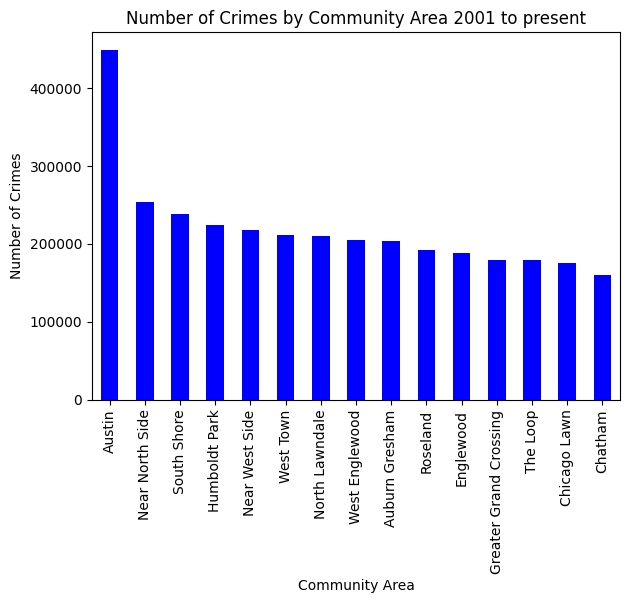

In [70]:
top_n = 15
crime_counts = merged_crimes['Community Area'].value_counts()
top_areas = crime_counts.nlargest(top_n)
topareas_df = top_areas.to_frame(name='Count')
bars = topareas_df.plot(kind='bar', legend=False, color='blue', width = 0.5)
plt.xlabel('Community Area')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Community Area 2001 to present')
plt.tight_layout()
plt.xticks(range(len(top_areas.index)),[chicago_neighborhoods[area] for area in top_areas.index], rotation = 90)
#plt.xticks(rotation=45, ha='right')
plt.show()

3.3

• Chicago's safety profile is depicted through our bar
graph, indicating areas with elevated crime
occurrences across the city's 77 neighborhoods.<br>
• This visualization depicts rapidly comprehending
crime patterns and pinpointing hotspots for
informed decision-making.<br>
• This data visualization has been instrumental in
proactively identifying and recommending areas
prone to crime hotspots, aiding in safe place
suggestions.

In [47]:
import geopandas
from geopandas import GeoDataFrame

In [49]:
heatmap_df = merged_crimes.copy()

In [50]:
heatmap_df = heatmap_df[(heatmap_df['Community Area'] != 0)]
heatmap_df['Community Area'] = heatmap_df['Community Area'].astype('int64')

In [51]:
df_counts = heatmap_df.groupby('Community Area').size().reset_index(name='crimes')
print(df_counts)

    Community Area  crimes
0                1  111184
1                2   92413
2                3  105669
3                4   51491
4                5   42338
..             ...     ...
72              73   85898
73              74   16147
74              75   57420
75              76   40584
76              77   72264

[77 rows x 2 columns]


In [53]:
chicago_geo = geopandas.read_file('geo_export_33ca7ae0-c469-46ed-84da-cc7587ccbfe6.shp')

In [54]:
chicago_geo.area_numbe.value_counts()

area_numbe
35    1
53    1
6     1
59    1
58    1
     ..
25    1
24    1
23    1
22    1
9     1
Name: count, Length: 77, dtype: int64

3.4

• Distinct shades of red on the map can be signified as "Critical" crime areas, while lighter shades denote "Moderate" and "Safe" zones, providing guidance for Chicago travelers and commuters.<br>
• These findings not only offer reassurance to travelers regarding safety but also assist law enforcement authorities in optimally allocating resources based on the identified crime intensity levels.<br>

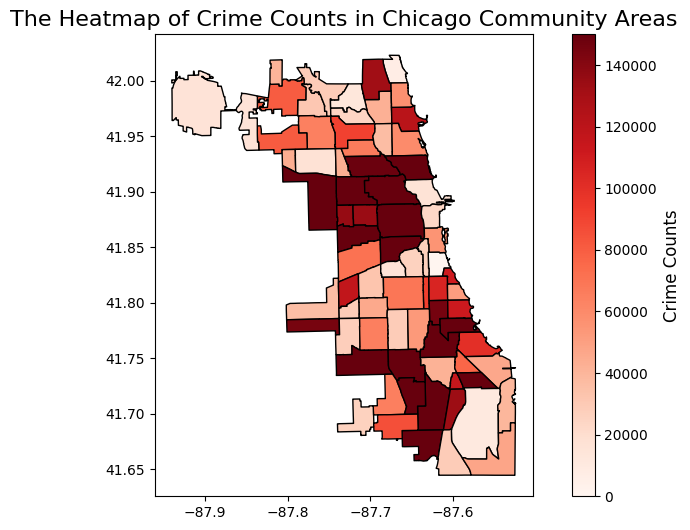

In [62]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

chicago_geo['area_numbe'] = chicago_geo['area_numbe'].astype(str)
merged_data = pd.concat([chicago_geo, df_counts.set_index('Community Area')], axis=1, join='outer')
merged_data['crimes'].fillna(0, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_data.plot(column='crimes', ax=ax, legend=True, cmap='Reds', edgecolor='black', vmin=0, vmax=150000)
ax.set_title("The Heatmap of Crime Counts in Chicago Community Areas", fontsize=16)
color_bar = ax.get_figure().get_axes()[1]
color_bar.set_ylabel('Crime Counts', fontsize=12)

plt.show()

## WORK ON STREETLIGHT DATASET

In [34]:
request_data = pd.read_csv("311SR_streetlights.csv", na_filter=False)

C:\Users\srava\AppData\Local\Temp\ipykernel_3924\3121980331.py:1: DtypeWarning: Columns (7,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  request_data = pd.read_csv("311SR_streetlights.csv", na_filter=False)


In [35]:
request_data['Creation Date'] = pd.to_datetime(request_data['Creation Date'])
request_data['Completion Date'] = pd.to_datetime(request_data['Completion Date'])
# Sorting the dataframe in ascending order
request_data = request_data.sort_values('Creation Date', ascending=True)

In [36]:
request_data.shape

(296673, 15)

In [37]:
request_data.columns

Index(['Creation Date', 'Status', 'Completion Date', 'Service Request Number',
       'Type of Service Request', 'Street Address', 'ZIP Code', 'X Coordinate',
       'Y Coordinate', 'Ward', 'Police District', 'Community Area', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [38]:
request_data  = request_data.drop(['Type of Service Request','Status','Street Address'],axis =  1)

In [39]:
request_data['Ward'] = pd.to_numeric(request_data['Ward'], errors='coerce')
request_data['Police District'] = pd.to_numeric(request_data['Police District'], errors='coerce')
request_data['Community Area'] = pd.to_numeric(request_data['Community Area'], errors='coerce')
request_data['Longitude'] = pd.to_numeric(request_data['Longitude'], errors='coerce')
request_data['Latitude'] = pd.to_numeric(request_data['Latitude'], errors='coerce')

In [40]:
request_data = request_data.dropna()

In [41]:
request_data.shape

(296184, 12)

In [42]:
main_df = request_data.copy()

In [43]:
main_df['Community Area'] = main_df['Community Area'].astype('int64')
main_df = main_df[(main_df['Community Area'] != 0)]
main_df["Community Area"].unique()

array([52, 19,  6, 25, 43, 29, 73, 66, 61, 42, 77, 28, 67, 68, 50, 44, 63,
       71, 46, 41, 69, 32, 51, 70, 54, 31, 30, 47, 33, 27, 49, 38, 16, 35,
       75, 14, 26, 22, 23, 57, 24, 17, 10,  3, 74, 13, 58, 34, 48,  8, 21,
       15, 53, 65,  5,  1, 12, 37, 72, 64,  7, 56, 55, 62, 40, 11,  4, 45,
        9, 60,  2, 20, 18, 76, 59, 39, 36], dtype=int64)

In [44]:
merged_crimes['Date'] = pd.to_datetime(merged_crimes['Date'])

In [45]:
crime_freqdf = merged_crimes.copy()

### Finding number of crimes in streetlight dataset by year,month and community area

In [63]:
crime_freqdf['Date'] = pd.to_datetime(crime_freqdf['Date'])

In [65]:
crime_freqdf = crime_freqdf[(crime_freqdf['Community Area'] != 0)]
crime_freqdf['Community Area'] = crime_freqdf['Community Area'].astype('int64')

In [182]:
crime_freqdf['month'] = crime_freqdf['Date'].dt.month
result_df = pd.DataFrame()

for community_area in crime_freqdf['Community Area'].unique():
    community_area_data = crime_freqdf[crime_freqdf['Community Area'] == community_area]
    monthly_counts = community_area_data['month'].value_counts().sort_index()
    total_crimes_year = len(community_area_data)
    community_area_result = pd.DataFrame({
        'Community Area': [community_area] * 12,
        'month': range(1, 13),
        'num_crimes': [monthly_counts.get(month, 0) for month in range(1, 13)],
        'percentage': [(count / total_crimes_year) * 100 for count in monthly_counts]
    })
    
    result_df = pd.concat([result_df, community_area_result], ignore_index=True)
print(result_df)

     Community Area  month  num_crimes  percentage
0                 8      1       19071        7.52
1                 8      2       16912        6.67
2                 8      3       19251        7.59
3                 8      4       19456        7.67
4                 8      5       22282        8.78
..              ...    ...         ...         ...
919              36      8        1741       10.43
920              36      9        1418        8.49
921              36     10        1359        8.14
922              36     11        1224        7.33
923              36     12        1131        6.77

[924 rows x 4 columns]


### finding num_requests in streetlight dataset by year,month and community area

In [183]:
main_df['month'] = main_df['Creation Date'].dt.month
final_df = pd.DataFrame()
for community_area in main_df['Community Area'].unique():
    community_area_data = main_df[main_df['Community Area'] == community_area]
    monthly_counts = community_area_data['month'].value_counts().sort_index()
    total_requests_year = len(community_area_data)
    community_area_result = pd.DataFrame({
        'Community Area': [community_area] * len(range(1, 13)),
        'month': range(1, 13),
        'num_requests': [monthly_counts.get(month, 0) for month in range(1, 13)],
    })
    final_df = pd.concat([final_df, community_area_result], ignore_index=True)
print(final_df)

     Community Area  month  num_requests
0                52      1           386
1                52      2           370
2                52      3           499
3                52      4           192
4                52      5           341
..              ...    ...           ...
919              36      8            37
920              36      9            50
921              36     10            35
922              36     11            21
923              36     12            34

[924 rows x 3 columns]


In [186]:
import pandas as pd
grouped_df = final_df.groupby("Community Area")
total_requests_by_area = grouped_df["num_requests"].transform("sum")
final_df["percentage"] = final_df["num_requests"] / total_requests_by_area * 100

print(final_df)

     Community Area  month  num_requests  percentage
0                52      1           386        8.06
1                52      2           370        7.73
2                52      3           499       10.42
3                52      4           192        4.01
4                52      5           341        7.12
..              ...    ...           ...         ...
919              36      8            37        9.89
920              36      9            50       13.37
921              36     10            35        9.36
922              36     11            21        5.61
923              36     12            34        9.09

[924 rows x 4 columns]


yellow dotted line is for streetlight requests
Blue filled line is for crimes



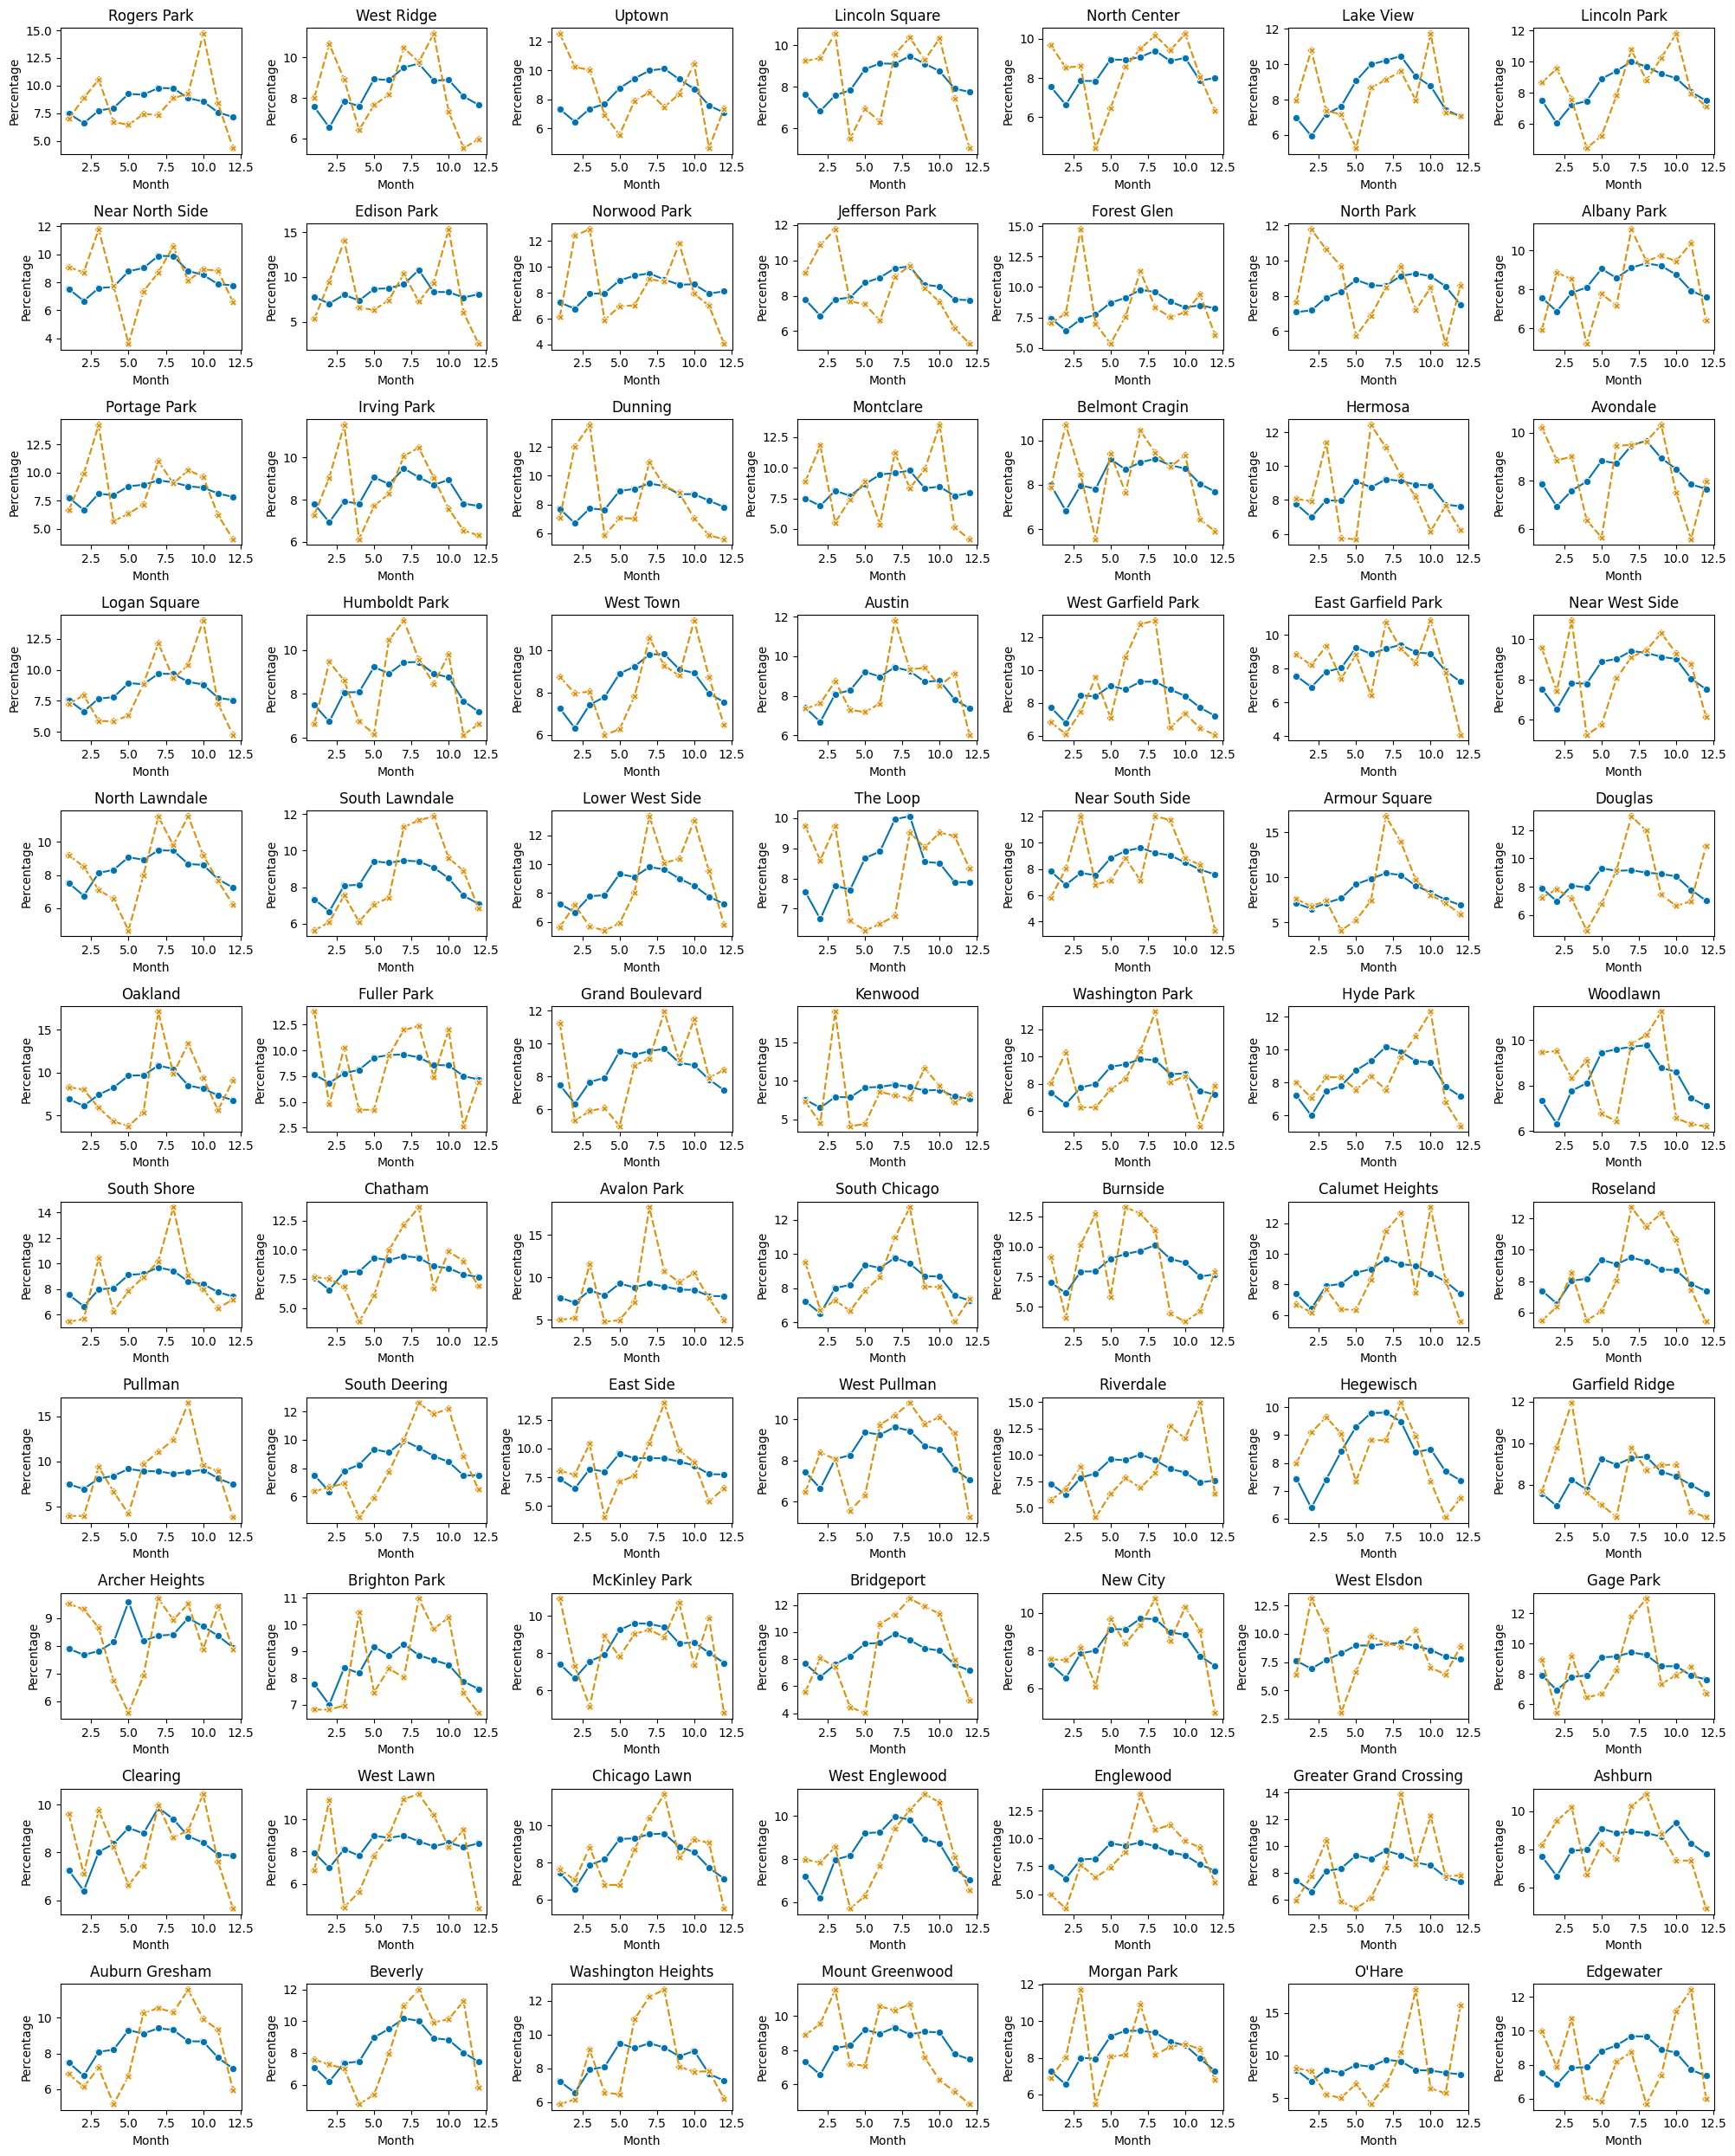

In [191]:
combined_df = pd.concat([result_df.assign(dataset='crimes'), final_df.assign(dataset='requests')])

fig, axes = plt.subplots(nrows=11, ncols=7, figsize=(20, 25))
axes = axes.flatten()

for i, community_area in enumerate(range(1, 78)):
    community_area_df = combined_df[combined_df['Community Area'] == community_area]
    
    sns.lineplot(
        x='month',
        y='percentage',
        hue='dataset',
        style='dataset',
        markers=True,
        data=community_area_df,
        palette='colorblind',
        legend = False,
        ax=axes[i]  
    )
    sns.scatterplot(
        x='month',
        y='percentage',
        hue='dataset',
        data=community_area_df,
        markers=True,
        palette='colorblind',
        legend=False,
        ax=axes[i]  
    )
    subplot_name = chicago_neighborhoods.get(community_area)
    axes[i].set_title(f"{subplot_name}")

    axes[i].set_xlabel("Month")
    axes[i].set_ylabel("Percentage")

plt.tight_layout()

print("yellow dotted line is for streetlight requests")
print("Blue filled line is for crimes")
print()

plt.show()

# 5) RESULTS

The above visualization(line plot + scatter plot) illustrates the simultaneous trends in service requests for street lights and the number of crimes.<br>
The trend is displayed for all 77 neighborhoods in monthly basis for all years that is from 2001 to present.<br>

Since both datasets are deferring in number of records, we've taken percentage as the y axis to avoid any issues.<br>
This normalization helps prevent biases that may arise due to differing sample sizes and facilitates a more meaningful visual comparison.<br>

Coming to final inference, trends were visible in certain neighborhoods, but a comprehensive understanding was not apparent across all of them.<br>
Therefore, we can infer that there is a lack of correlation between street light functionality and crime occurrences.<br>

Visualization Key:<br>
Yellow dotted line is for streetlight requests<br>
Blue filled line is for crimes<br>
In both plots, the point depicts the current month.(1st point = January, 12th point = december)